In [26]:
class Personage:
    def __init__(
            self,
            hp,
            attack,
            defense,
            strength,
            agility,
            wisdom
    ):
        self.hp = hp
        self.attack = attack
        self.defense = defense
        self.strength = strength
        self.agility = agility
        self.wisdom = wisdom

In [27]:
min_hit = 0.3
max_hit = 0.9
min_atk = 0.5
strength_multi = 2
agility_def_multi = 1.7
agility_hit_multi = 0.5
min_crit_chance = 0.1
max_crit_chance = 0.9
wisdom_crit_multi = 1.5
wisdom_chance_multi = 0.5

In [28]:
def calculate_power(personage1: Personage, personage2: Personage) -> int:
    # бонус атаки
    strength = personage1.strength - personage2.strength
    strength = strength if strength > 0 else 0
    bonus_a1 = 1 + (strength * strength_multi) / 100
    # бонус крита
    wisdom = personage1.wisdom - personage2.wisdom
    wisdom = wisdom if wisdom > 0 else 0
    bonus_c1 = 1.2 + (wisdom * wisdom_crit_multi) / 100
    # шанс крита
    chance_c1 = 0.5 + ((personage1.wisdom - personage2.wisdom) * wisdom_chance_multi) / 100
    chance_c1 = min_crit_chance if chance_c1 < min_crit_chance else max_crit_chance if chance_c1 > max_crit_chance else chance_c1
    # бонус крита с учётом шанса
    bonus_c1 = 1 + chance_c1 * (bonus_c1 - 1)
    # бонус защиты игрока 2
    agility = personage2.agility - personage1.agility
    agility = agility if agility > 0 else 0
    bonus_d1 = 1 + (agility * agility_def_multi) / 100
    # итоговая атака
    atk1 = personage1.attack * bonus_a1 * bonus_c1 - personage2.defense * bonus_d1
    atk1 = atk1 if atk1 > personage1.attack * min_atk else personage1.attack * min_atk
    # шанс попадания
    chance1 = 0.5 + ((personage1.agility - personage2.agility) * agility_hit_multi) / 100
    chance1 = min_hit if chance1 < min_hit else max_hit if chance1 > max_hit else chance1
    return personage1.hp * atk1 * chance1

In [29]:
from random import randrange


def battle(personage1: Personage, personage2: Personage) -> bool:
    strength = personage1.strength - personage2.strength
    bonus_a1 = 1 + ((strength if strength > 0 else 0) * strength_multi) / 100
    bonus_a2 = 1 + ((-strength if strength < 0 else 0) * strength_multi) / 100

    wisdom = personage1.wisdom - personage2.wisdom
    bonus_c1 = 1.2 + ((wisdom if wisdom > 0 else 0) * wisdom_crit_multi) / 100
    bonus_c2 = 1.2 + ((-wisdom if wisdom < 0 else 0) * wisdom_crit_multi) / 100

    chance_c = 0.5 + (wisdom * wisdom_chance_multi) / 100
    chance_c1 = min_crit_chance if chance_c < min_crit_chance else max_crit_chance if chance_c > max_crit_chance else chance_c
    chance_c = 0.5 - (wisdom * wisdom_chance_multi) / 100
    chance_c2 = min_crit_chance if chance_c < min_crit_chance else max_crit_chance if chance_c > max_crit_chance else chance_c

    agility = personage1.agility - personage2.agility
    bonus_d1 = 1 + ((agility if agility > 0 else 0) * agility_def_multi) / 100
    bonus_d2 = 1 + ((-agility if agility < 0 else 0) * agility_def_multi) / 100


    chance_a1 = 0.5 + agility * agility_hit_multi / 100
    chance_a1 = min_hit if chance_a1 < min_hit else max_hit if chance_a1 > max_hit else chance_a1
    chance_a2 = 0.5 - agility * agility_hit_multi / 100
    chance_a2 = min_hit if chance_a2 < min_hit else max_hit if chance_a2 > max_hit else chance_a2

    turn1 = randrange(2) == 0
    while personage1.hp > 0 and personage2.hp > 0:
        chance_a = randrange(1, 101) / 100
        chance_c = randrange(1, 101) / 100
        if turn1:
            if chance_a <= chance_a1:
                crit = bonus_c1 if chance_c <= chance_c1 else 1
                atk1 = personage1.attack * bonus_a1 * crit - personage2.defense * bonus_d2
                atk1 = atk1 if atk1 > personage1.attack * min_atk else personage1.attack * min_atk
                personage2.hp -= atk1
        else:
            if chance_a <= chance_a2:
                crit = bonus_c2 if chance_c <= chance_c2 else 1
                atk2 = personage2.attack * bonus_a2 * crit - personage1.defense * bonus_d1
                atk2 = atk2 if atk2 > personage2.attack * min_atk else personage2.attack * min_atk
                personage1.hp -= atk2
        turn1 = not turn1

    return personage1.hp > 0

In [30]:
def default_pers():
    return Personage(10000, 250, 250, 1, 1, 1)

In [31]:
personage1 = default_pers()
personage2 = default_pers()

In [32]:
calculate_power(personage1, personage2)

625000.0

In [33]:
personage1 = default_pers()
agility_growth = []
sum_agil = 0
while personage1.agility < 200:
    temp = calculate_power(personage1, personage2)
    personage1.agility += 1
    agility_growth.append(calculate_power(personage1, personage2)/temp)
    sum_agil += calculate_power(personage1, personage2)/temp - 1

In [34]:
personage1 = default_pers()
wisdom_growth = []
sum_wis = 0
while personage1.wisdom < 200:
    temp = calculate_power(personage1, personage2)
    personage1.wisdom += 1
    wisdom_growth.append(calculate_power(personage1, personage2)/temp)
    sum_wis += calculate_power(personage1, personage2)/temp - 1

In [35]:
personage1 = default_pers()
strength_growth = []
sum_strength = 0
while personage1.strength < 200:
    temp = calculate_power(personage1, personage2)
    personage1.strength += 1
    strength_growth.append(calculate_power(personage1, personage2)/temp)
    sum_strength += calculate_power(personage1, personage2)/temp - 1

In [36]:
import matplotlib.pyplot as plt

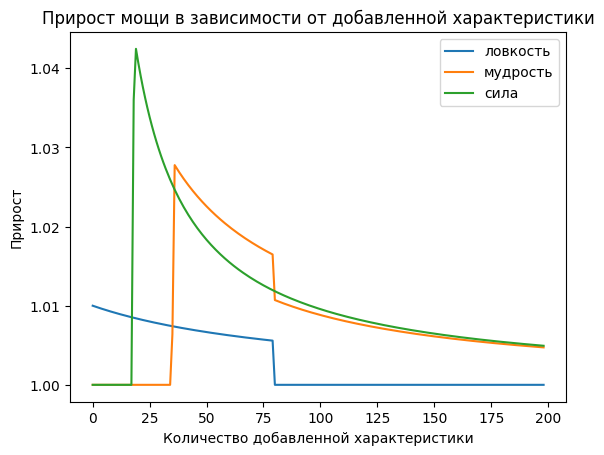

In [37]:
x = [i for i in range(199)]
plt.title("Прирост мощи в зависимости от добавленной характеристики")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Прирост")
plt.plot(x, agility_growth, label="ловкость")
plt.plot(x, wisdom_growth, label="мудрость")
plt.plot(x, strength_growth, label="сила")
plt.legend()

# Считаем соотношение прокачки только одной характеристики
Л - ловкость
С - сила
М - мудрость

In [38]:
count = 1000

## Л к С

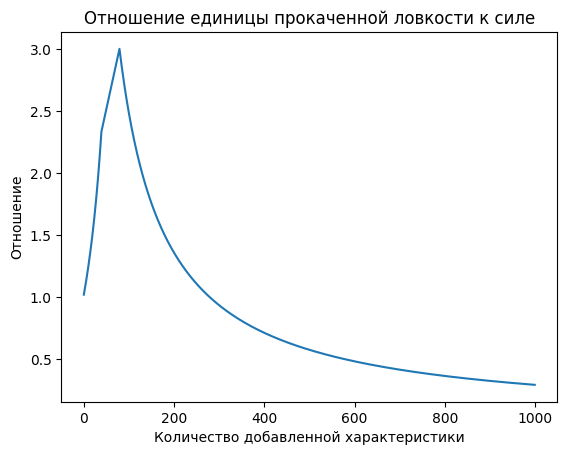

In [39]:
x = [i for i in range(count)]
personage4 = default_pers()
personage5 = default_pers()
power_ratio = []
for _ in range(count):
    personage4.agility += 1
    personage5.strength += 1
    power_ratio.append(calculate_power(personage4, personage5) / calculate_power(personage5, personage4))
plt.title("Отношение единицы прокаченной ловкости к силе")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Отношение")
plt.plot(x, power_ratio)

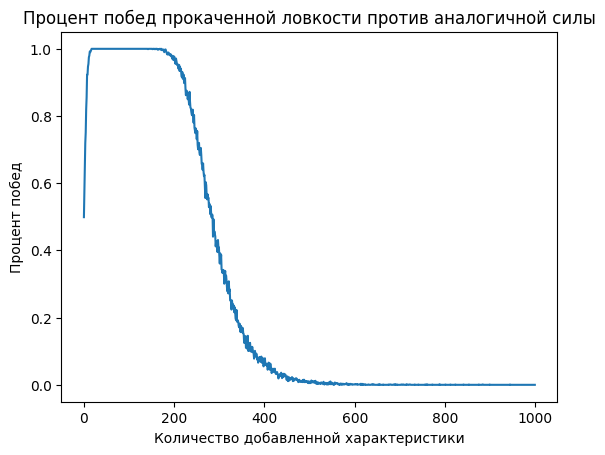

In [40]:
x = [i for i in range(count)]
percent_win = []
for i in range(count):
    wins = 0
    for _ in range(1000):
        personage4 = default_pers()
        personage5 = default_pers()
        personage4.agility += i
        personage5.strength += i
        wins += 1 if battle(personage4, personage5) else 0
    percent_win.append(wins / 1000)
plt.title("Процент побед прокаченной ловкости против аналогичной силы")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Процент побед")
plt.plot(x, percent_win)

## М к Л

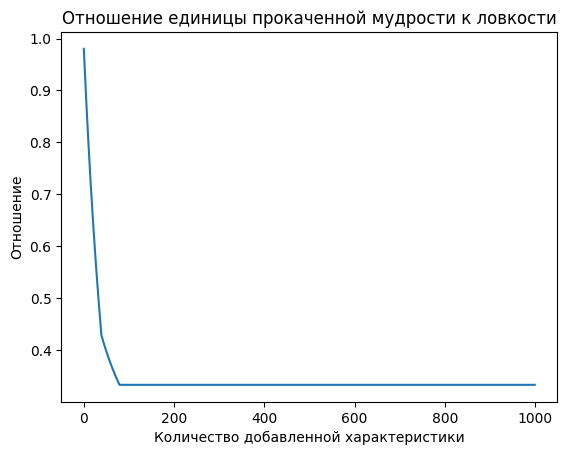

In [41]:
x = [i for i in range(count)]
personage4 = default_pers()
personage5 = default_pers()
power_ratio = []
for _ in range(count):
    personage4.wisdom += 1
    personage5.agility += 1
    power_ratio.append(calculate_power(personage4, personage5) / calculate_power(personage5, personage4))
plt.title("Отношение единицы прокаченной мудрости к ловкости")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Отношение")
plt.plot(x, power_ratio)

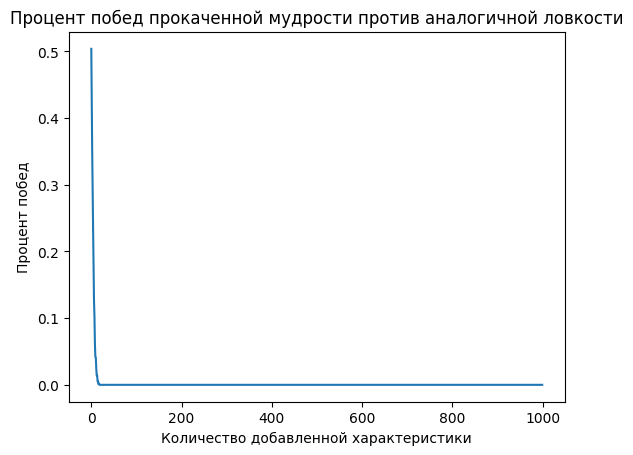

In [42]:
x = [i for i in range(count)]
percent_win = []
for i in range(count):
    wins = 0
    for _ in range(1000):
        personage4 = default_pers()
        personage5 = default_pers()
        personage4.wisdom += i
        personage5.agility += i
        wins += 1 if battle(personage4, personage5) else 0
    percent_win.append(wins / 1000)
plt.title("Процент побед прокаченной мудрости против аналогичной ловкости")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Процент побед")
plt.plot(x, percent_win)

## С к М

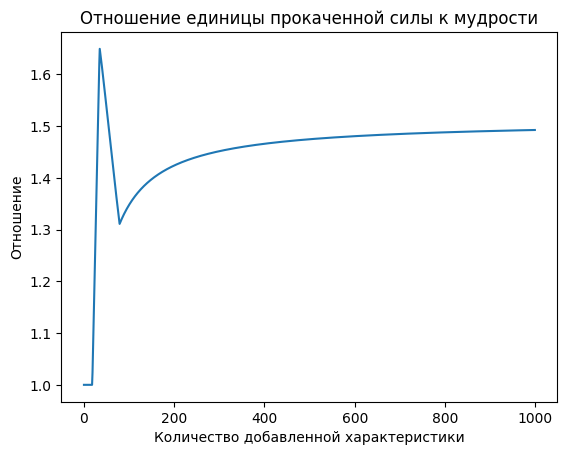

In [43]:
x = [i for i in range(count)]
personage4 = default_pers()
personage5 = default_pers()
power_ratio = []
for _ in range(count):
    personage4.strength += 1
    personage5.wisdom += 1
    power_ratio.append(calculate_power(personage4, personage5) / calculate_power(personage5, personage4))
plt.title("Отношение единицы прокаченной силы к мудрости")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Отношение")
plt.plot(x, power_ratio)

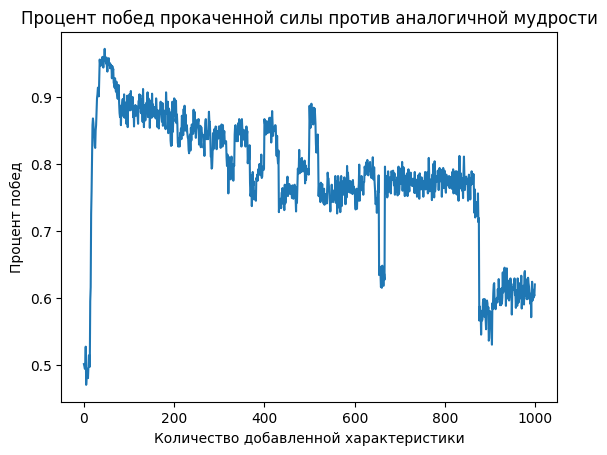

In [44]:
x = [i for i in range(count)]
percent_win = []
for i in range(count):
    wins = 0
    for _ in range(1000):
        personage4 = default_pers()
        personage5 = default_pers()
        personage4.strength += i
        personage5.wisdom += i
        wins += 1 if battle(personage4, personage5) else 0
    percent_win.append(wins / 1000)
plt.title("Процент побед прокаченной силы против аналогичной мудрости")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Процент побед")
plt.plot(x, percent_win)

# Считаем соотношение прокачки только двух характеристик в одинаковых пропорциях


## МС к ЛС

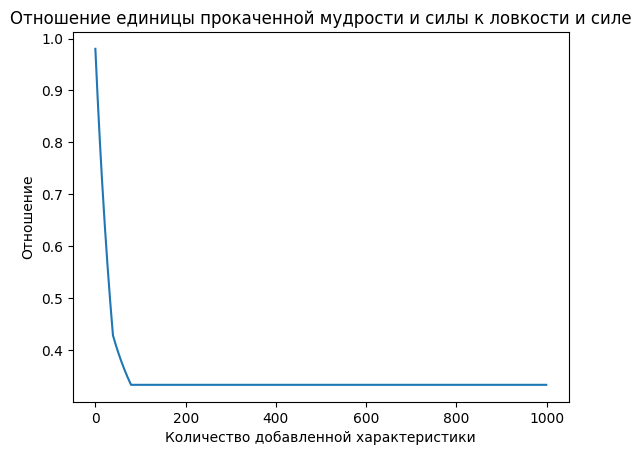

In [45]:
x = [i for i in range(count)]
personage4 = default_pers()
personage5 = default_pers()
power_ratio = []
for _ in range(count):
    personage4.wisdom += 1
    personage4.strength += 1
    personage5.agility += 1
    personage5.strength += 1
    power_ratio.append(calculate_power(personage4, personage5) / calculate_power(personage5, personage4))
plt.title("Отношение единицы прокаченной мудрости и силы к ловкости и силе")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Отношение")
plt.plot(x, power_ratio)

## ЛМ к МС

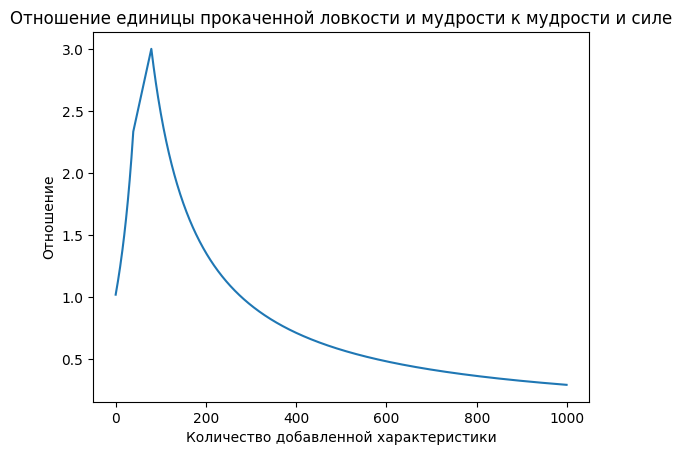

In [46]:
x = [i for i in range(count)]
personage4 = default_pers()
personage5 = default_pers()
power_ratio = []
for _ in range(count):
    personage4.agility += 1
    personage4.wisdom += 1
    personage5.wisdom += 1
    personage5.strength += 1
    power_ratio.append(calculate_power(personage4, personage5) / calculate_power(personage5, personage4))
plt.title("Отношение единицы прокаченной ловкости и мудрости к мудрости и силе")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Отношение")
plt.plot(x, power_ratio)

## ЛС к ЛМ

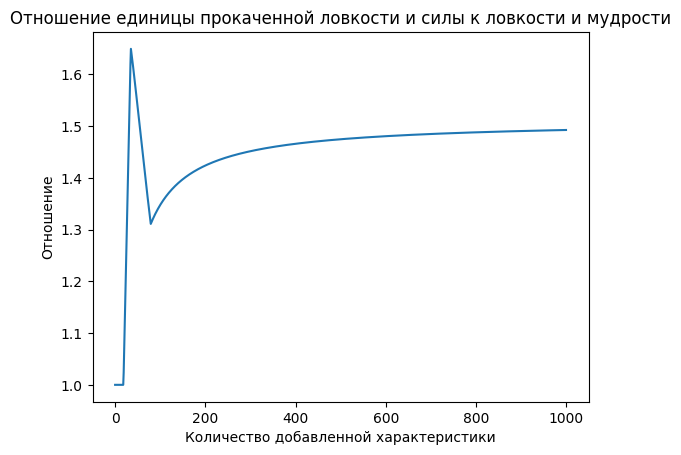

In [47]:
x = [i for i in range(count)]
personage4 = default_pers()
personage5 = default_pers()
power_ratio = []
for _ in range(count):
    personage4.strength += 1
    personage4.agility += 1
    personage5.wisdom += 1
    personage5.agility += 1
    power_ratio.append(calculate_power(personage4, personage5) / calculate_power(personage5, personage4))
plt.title("Отношение единицы прокаченной ловкости и силы к ловкости и мудрости")
plt.xlabel("Количество добавленной характеристики")
plt.ylabel("Отношение")
plt.plot(x, power_ratio)